In [1227]:
import pandas as pd
import numpy as np
import seaborn as sns 
import time

from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import regularizers#正则化
from numpy import array

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation
from keras import optimizers

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import LabelEncoder


import datetime


In [1228]:
df = pd.read_csv('/Users/qidongfang/Documents/learning/PRSA_Data_Changping_20130301-20170228.csv')
print(df)

          No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  \
0          1  2013      3    1     0    3.0   6.0  13.0   7.0  300.0  85.0   
1          2  2013      3    1     1    3.0   3.0   6.0   6.0  300.0  85.0   
2          3  2013      3    1     2    3.0   3.0  22.0  13.0  400.0  74.0   
3          4  2013      3    1     3    3.0   6.0  12.0   8.0  300.0  81.0   
4          5  2013      3    1     4    3.0   3.0  14.0   8.0  300.0  81.0   
...      ...   ...    ...  ...   ...    ...   ...   ...   ...    ...   ...   
35059  35060  2017      2   28    19   28.0  47.0   4.0  14.0  300.0   NaN   
35060  35061  2017      2   28    20   12.0  12.0   3.0  23.0  500.0  64.0   
35061  35062  2017      2   28    21    7.0  23.0   5.0  17.0  500.0  68.0   
35062  35063  2017      2   28    22   11.0  20.0   3.0  15.0  500.0  72.0   
35063  35064  2017      2   28    23   20.0  25.0   6.0  28.0  900.0  54.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM    station  
0      

In [1229]:
# viewing info about the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34290 non-null  float64
 6   PM10     34482 non-null  float64
 7   SO2      34436 non-null  float64
 8   NO2      34397 non-null  float64
 9   CO       33543 non-null  float64
 10  O3       34460 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [1230]:
feature_column='wd' #确定需要处理的特征列名
classes = df[feature_column].unique() #找出特征的不同类别

In [1231]:
encoder = LabelEncoder()
df[feature_column] = encoder.fit_transform(df[feature_column]) #使用标签编码将特征转化为整数形式：

In [1232]:
print(df[feature_column])

0        0
1        1
2        1
3        5
4        3
        ..
35059    5
35060    3
35061    3
35062    7
35063    3
Name: wd, Length: 35064, dtype: int64


In [1233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34290 non-null  float64
 6   PM10     34482 non-null  float64
 7   SO2      34436 non-null  float64
 8   NO2      34397 non-null  float64
 9   CO       33543 non-null  float64
 10  O3       34460 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       35064 non-null  int64  
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(6), object(1)
memory usage: 4.8+ MB


In [1234]:
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,0,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,1,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,1,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,5,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,3,2.1,Changping


In [1235]:
print(df.shape)

(35064, 18)


In [1236]:
print(df.describe)

<bound method NDFrame.describe of           No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  \
0          1  2013      3    1     0    3.0   6.0  13.0   7.0  300.0  85.0   
1          2  2013      3    1     1    3.0   3.0   6.0   6.0  300.0  85.0   
2          3  2013      3    1     2    3.0   3.0  22.0  13.0  400.0  74.0   
3          4  2013      3    1     3    3.0   6.0  12.0   8.0  300.0  81.0   
4          5  2013      3    1     4    3.0   3.0  14.0   8.0  300.0  81.0   
...      ...   ...    ...  ...   ...    ...   ...   ...   ...    ...   ...   
35059  35060  2017      2   28    19   28.0  47.0   4.0  14.0  300.0   NaN   
35060  35061  2017      2   28    20   12.0  12.0   3.0  23.0  500.0  64.0   
35061  35062  2017      2   28    21    7.0  23.0   5.0  17.0  500.0  68.0   
35062  35063  2017      2   28    22   11.0  20.0   3.0  15.0  500.0  72.0   
35063  35064  2017      2   28    23   20.0  25.0   6.0  28.0  900.0  54.0   

       TEMP    PRES  DEWP  RA

In [1237]:
##checking how many null values are in each column
df.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       774
PM10        582
SO2         628
NO2         667
CO         1521
O3          604
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd            0
WSPM         43
station       0
dtype: int64

In [1238]:
# dropping all the rows with NaN values
df = df.dropna()

In [1239]:
df.isnull().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [1240]:
print(df.shape)

(32774, 18)


In [1241]:
train = df[:24684]
rest = df[24684:]
val = rest[:int(len(rest)*0.5)]
test = rest[int(len(rest)*0.5):]

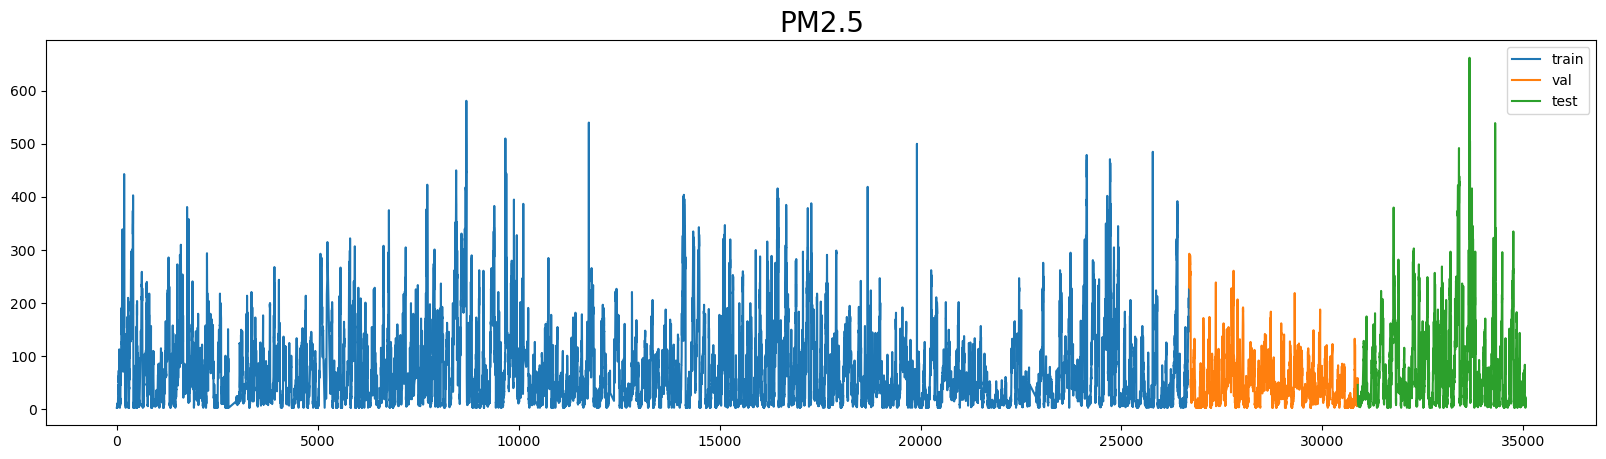

In [1242]:
sns.reset_orig()
plt.figure(figsize=(20,5))
plt.title('PM2.5', fontsize = 20)
plt.plot(train['PM2.5'], label = 'train')
plt.plot(val['PM2.5'],label = 'val')
plt.plot(test['PM2.5'],label = 'test')

plt.legend(fontsize = 10)
plt.show()

In [1243]:
X_train = train.drop(columns = {'PM2.5','station'})
X_val = val.drop(columns = {'PM2.5','station'})
X_test = test.drop(columns = {'PM2.5','station'})

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(24684, 16)
(4045, 16)
(4045, 16)


In [1244]:
y_train = train['PM2.5']
y_val = val['PM2.5']
y_test = test['PM2.5']

In [1245]:
y_train_norm = np.asarray(y_train)
y_train = np.reshape(y_train_norm,(-1,1))
scaler = MinMaxScaler(feature_range=(0,1))
y_train = scaler.fit_transform(y_train)


y_val_norm = np.asarray(y_val)
y_val = np.reshape(y_val_norm,(-1,1))
scaler = MinMaxScaler(feature_range=(0,1))
y_val = scaler.fit_transform(y_val)

y_test_norm = np.asarray(y_test)
y_test = np.reshape(y_test_norm,(-1,1))
scaler = MinMaxScaler(feature_range=(0,1))
y_test = scaler.fit_transform(y_test)

In [1246]:
scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_val = scaler.fit_transform(X_val)
x_test = scaler.fit_transform(X_test)

In [1247]:
def getModel():
    model = Sequential()
    model.add(Dense(50,input_shape = (16,)))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(120))
    model.add(Activation('linear'))
    model.add(Dense(1,activation='relu'))
    model.compile(loss='mse',optimizer= 'adam', metrics = ['accuracy'])
    print(model.summary())
    return model

In [1248]:
model = getModel()

Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_166 (Dense)           (None, 50)                850       
                                                                 
 activation_124 (Activation)  (None, 50)               0         
                                                                 
 dropout_35 (Dropout)        (None, 50)                0         
                                                                 
 dense_167 (Dense)           (None, 50)                2550      
                                                                 
 activation_125 (Activation)  (None, 50)               0         
                                                                 
 dropout_36 (Dropout)        (None, 50)                0         
                                                                 
 dense_168 (Dense)           (None, 120)             

In [1249]:
%time
hist = model.fit(x_train,y_train,
         batch_size=64,epochs=50,
         verbose=1,validation_split=0.1,
         validation_data=(x_val,y_val),shuffle=True)

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 6.91 µs
Epoch 1/50
348/348 [==============================] - 1s 2ms/step - loss: 0.0200 - accuracy: 0.0206 - val_loss: 0.0026 - val_accuracy: 0.0085
Epoch 2/50
348/348 [==============================] - 0s 1ms/step - loss: 0.0038 - accuracy: 0.0206 - val_loss: 0.0023 - val_accuracy: 0.0085
Epoch 3/50
348/348 [==============================] - 0s 1ms/step - loss: 0.0030 - accuracy: 0.0206 - val_loss: 0.0015 - val_accuracy: 0.0085
Epoch 4/50
348/348 [==============================] - 0s 1ms/step - loss: 0.0028 - accuracy: 0.0206 - val_loss: 0.0014 - val_accuracy: 0.0085
Epoch 5/50
348/348 [==============================] - 0s 1ms/step - loss: 0.0024 - accuracy: 0.0206 - val_loss: 0.0014 - val_accuracy: 0.0085
Epoch 6/50
348/348 [==============================] - 0s 1ms/step - loss: 0.0023 - accuracy: 0.0206 - val_loss: 0.0017 - val_accuracy: 0.0085
Epoch 7/50
348/348 [==============================] - 0s 1ms/step - loss: 0.0022

In [1250]:
print(hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [1251]:
pred = model.predict(x_val)
r2 = r2_score(pred,y_val)
mse = mean_squared_error(pred,y_val)
print(r2)
print(mse)

0.26409095379809255
0.007717631710527846


In [1252]:
pred2 = model.predict(x_test)
r2 = r2_score(pred2,y_test)
mse = mean_squared_error(pred2,y_test)
print(r2)
print(mse)

0.9085348794757162
0.0013091276499271162


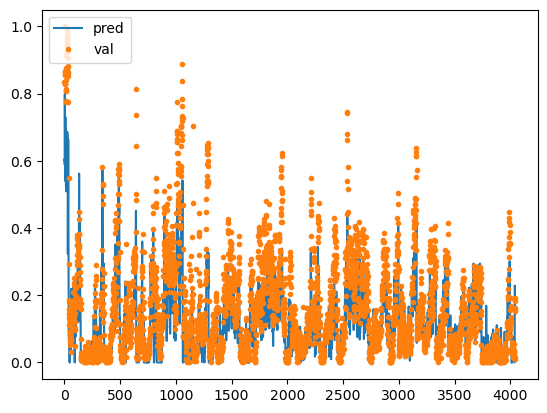

In [1253]:
plt.plot(pred)
plt.plot(y_val,'.')
plt.legend(['pred','val'],loc = 'upper left')
plt.show()

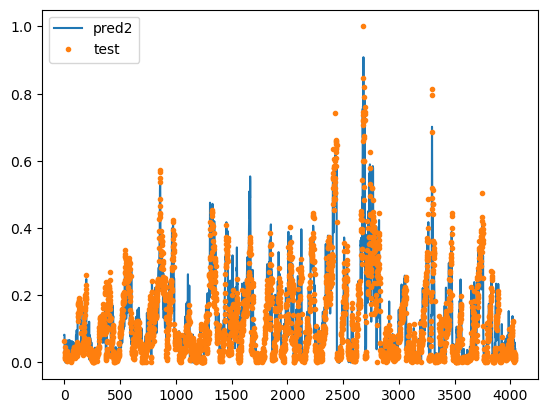

In [1254]:
plt.plot(pred2)
plt.plot(y_test,'.')
plt.legend(['pred2','test'],loc = 'upper left')
plt.show()

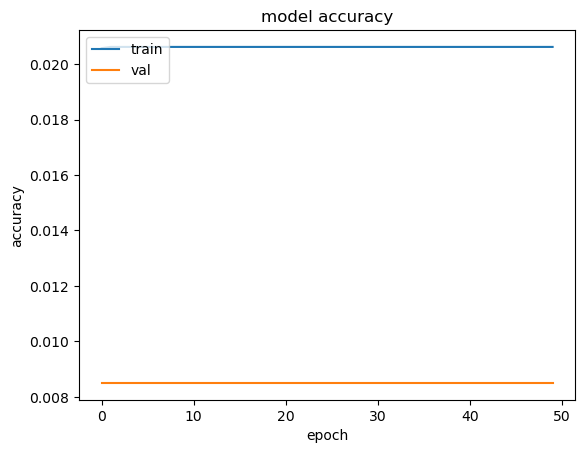

In [1255]:
# summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'], loc='upper left')
plt.show()

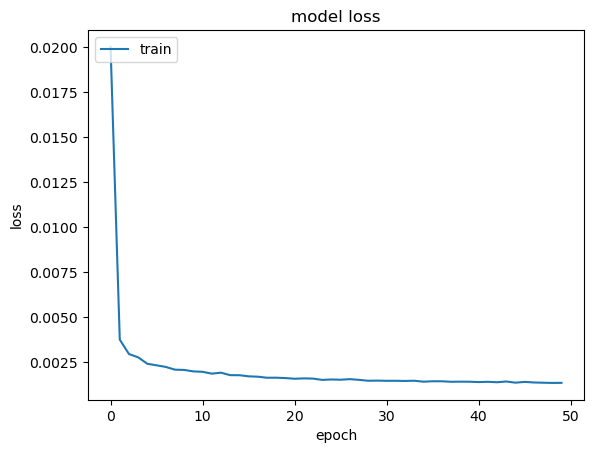

In [1256]:
plt.plot(hist.history['loss'])
#plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'],loc = 'upper left')
plt.show()

In [1257]:
pd.DataFrame(pred2).to_csv('ann.csv',index = False)

In [1258]:
pd.DataFrame(hist.history['loss']).to_csv('annloss.csv',index = False)